In [2]:
# Libraies 
from sklearn.datasets import make_classification
import numpy as np

In [3]:
X, y = make_classification(
    n_samples=100,            # total number of samples
    n_features=2,             # number of features
    n_informative=1,          # number of informative features
    n_redundant=0,            # no redundant features
    n_classes=2,              # binary classification
    n_clusters_per_class=1,   # one cluster for each class
    random_state=41,          # reproducibility
    hypercube=False,          # simple cluster shapes
    class_sep=10              # classes far apart
)

In [4]:
import matplotlib.pyplot as plt

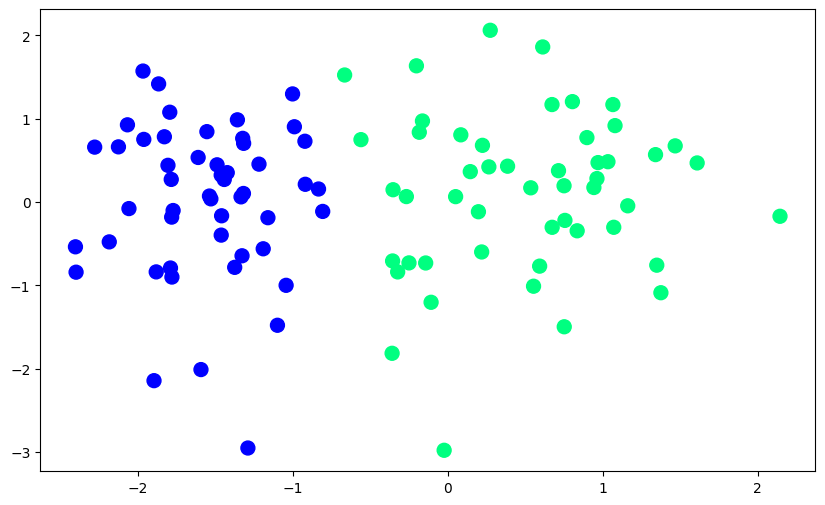

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [6]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [7]:
def step(z):
    return 1 if z>0 else 0

In [8]:
intercept_,coef_ = perceptron(X,y)

In [9]:
print(coef_)
print(intercept_)

[1.31395071 0.14280643]
0.9


In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

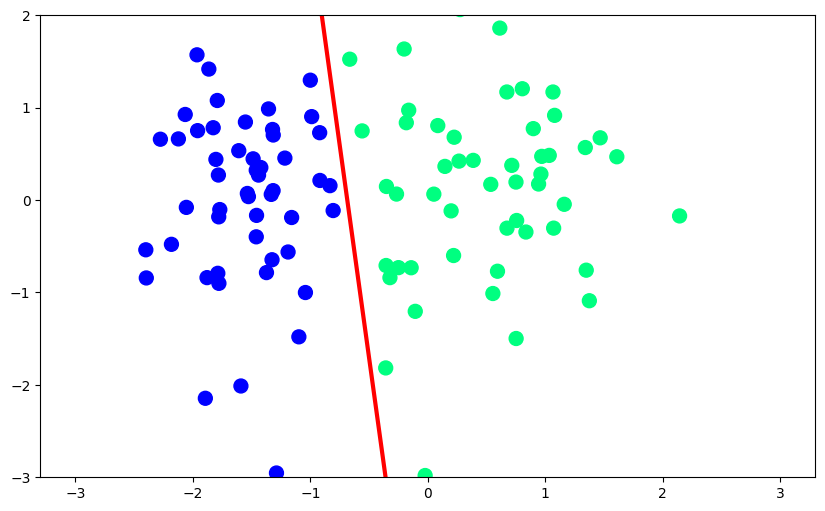

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [13]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [14]:
m,b = perceptron(X,y)

In [15]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [25]:
%matplotlib notebook


In [17]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [19]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [20]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [22]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

<IPython.core.display.Javascript object>